In [294]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing


In [334]:
batting_data_path = 'bsb_ref.csv'
# INFO:
# 101,332 Players with up to 20 features each (exluding year, including team)
# if metric not reported for player, set to 0.0 by default

df_original = pd.read_csv(batting_data_path)
df = df_original.fillna(df.mean()) # fixing this could really help with results potentially
df_recent_players = df[df.year_ID >= 1975] 
df_just_hitters = df_recent_players[df_recent_players.pitcher == 'N']
players = list(set(df_probably_not_pitchers['name_common'])) # just a set of all players

players_with_more_than_20_years = [player for player in players if len(df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == player]) >= 16]

['Kirk Gibson', 'Stan Javier', 'Tim Raines', 'Willie Randolph', 'Carlton Fisk', 'Harold Baines', 'Jose Canseco', 'Jose Guillen', 'Dave Collins', 'Brady Anderson', 'Dave Martinez', 'Luis Castillo', 'Jose Reyes', 'Adrian Beltre', 'Aramis Ramirez', 'Alex Rodriguez', 'Mark Teixeira', 'Brian Giles', 'Edgar Martinez', 'Devon White', 'Edwin Encarnacion', 'Matt Stairs', 'Lenny Harris', 'Raul Ibanez', 'Dave Magadan', 'Russell Branyan', 'Terry Pendleton', 'Mike Cameron', 'Carlos Baerga', 'Jeff Reed', 'Jay Bell', 'Tino Martinez', 'Jim Edmonds', 'Kenny Lofton', 'Torii Hunter', 'Craig Counsell', 'Moises Alou', 'Jerry Hairston', 'Bernie Williams', 'Coco Crisp', 'Jeff Kent', 'Damion Easley', 'Jose Cruz', 'Brian Downing', 'Delino DeShields', 'Barry Bonds', 'Garry Templeton', 'Tony Armas', 'Derek Jeter', 'Robin Ventura', 'John Olerud', 'Jeff Conine', 'Luis Gonzalez', 'Jim Gantner', 'Benito Santiago', 'David Ortiz', 'Eric Young Sr.', 'Reggie Sanders', 'Shawon Dunston', 'Mike Sweeney', 'Lance Berkman', '

In [603]:
def prepare_test_train(player_x_data, player_y_data):
    i_0, i_1 = 14, 15# hardcoded for now. these are just the ranges described above
    x_train = player_x_data[:i_0]
    y_train = player_y_data[:i_0]
    x_test = player_x_data[i_0:i_1]
    y_test = player_y_data[i_0:i_1]
    return (x_train, y_train, x_test, y_test)

In [604]:
from sklearn import preprocessing

def prepare_rows(player_rows):
    player_x_data = np.asarray([i for i in range(len(player_rows))]).reshape(-1,1)
    player_y_data = player_rows[['OPS_plus']].values
    return (player_x_data, player_y_data)

In [634]:
def run_svr(data_tuple):
    x_train, y_train, x_test, y_test = data_tuple
    #print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#     parameters = {
#     "kernel": ["poly"],
#     "C": [1,10,10,100,150,1000, 10e5],
#     "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e2, 1e8],
#     "epsilon": [0.1, 1e-4, 1e2]
#     }

#     svr = GridSearchCV(SVR(), parameters, cv=3)
    svr = SVR(kernel='poly', C=100, gamma='auto',degree=3, epsilon=.1,
               coef0=1)
    svr.fit(x_train, y_train.ravel())

    y_svr_pred = svr.predict(x_test)
    print("Actual OPS_plus", y_test.ravel())
    print("Predicted OPS_plus", y_svr_pred)
    
    mse = mean_squared_error(y_test, y_svr_pred)
    mae = mean_absolute_error(y_test, y_svr_pred)
    print('Score: %.3f' % svr.score(x_train, y_train))
    print("Mean squared error: %.3f" % mse)
    print('Mean Absolute error: %.3f' % mae)
    print('Variance score: %.3f' % r2_score(y_test, y_svr_pred))
    print()
    
    return (y_test, y_svr_pred, mae, mse)


    

In [ ]:
# let's try this again but better...
from collections import defaultdict
loss_dict = defaultdict(float)
tot_mse_loss = 0
tot_mae_loss = 0
y_true = []
y_pred = []

for player in players_with_more_than_20_years:
    print(player)
    player_rows = df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == player]
    data = prepare_rows(player_rows)
    data_tuple = prepare_test_train(data[0], data[1])
    results = run_svr(data_tuple)
    loss_dict[player] = results
    y_true.append(results[0][0])
    y_pred.append(results[1][0])
    tot_mse_loss += loss_dict[player][-1]
    tot_mae_loss += loss_dict[player][-2]

Kirk Gibson
Actual OPS_plus [130.1477]
Predicted OPS_plus [115.15964]
Score: 0.329
Mean squared error: 224.642
Mean Absolute error: 14.988
Variance score: 0.000

Stan Javier
Actual OPS_plus [111.3957]
Predicted OPS_plus [107.6477092]
Score: 0.361
Mean squared error: 14.047
Mean Absolute error: 3.748
Variance score: 0.000

Tim Raines
Actual OPS_plus [111.0607]
Predicted OPS_plus [95.39925259]
Score: 0.250
Mean squared error: 245.281
Mean Absolute error: 15.661
Variance score: 0.000

Willie Randolph
Actual OPS_plus [100.8685]
Predicted OPS_plus [97.93718774]
Score: 0.047
Mean squared error: 8.593
Mean Absolute error: 2.931
Variance score: 0.000

Carlton Fisk
Actual OPS_plus [135.9149]
Predicted OPS_plus [182.93439212]
Score: 0.043
Mean squared error: 2210.833
Mean Absolute error: 47.019
Variance score: 0.000

Harold Baines
Actual OPS_plus [107.9611]
Predicted OPS_plus [159.66405375]
Score: 0.144
Mean squared error: 2673.195
Mean Absolute error: 51.703
Variance score: 0.000

Jose Canseco


Actual OPS_plus [101.3637]
Predicted OPS_plus [89.10981087]
Score: -0.061
Mean squared error: 150.158
Mean Absolute error: 12.254
Variance score: 0.000

Jeff Conine
Actual OPS_plus [110.0343]
Predicted OPS_plus [122.21336199]
Score: 0.137
Mean squared error: 148.330
Mean Absolute error: 12.179
Variance score: 0.000

Luis Gonzalez
Actual OPS_plus [117.6018]
Predicted OPS_plus [139.65175624]
Score: 0.225
Mean squared error: 486.201
Mean Absolute error: 22.050
Variance score: 0.000

Jim Gantner
Actual OPS_plus [90.3017]
Predicted OPS_plus [100.08201077]
Score: 0.332
Mean squared error: 95.654
Mean Absolute error: 9.780
Variance score: 0.000

Benito Santiago
Actual OPS_plus [76.0703]
Predicted OPS_plus [66.52987372]
Score: 0.299
Mean squared error: 91.020
Mean Absolute error: 9.540
Variance score: 0.000

David Ortiz
Actual OPS_plus [173.281]
Predicted OPS_plus [74.09465901]
Score: 0.175
Mean squared error: 9837.930
Mean Absolute error: 99.186
Variance score: 0.000

Eric Young Sr.
Actual OP

Actual OPS_plus [50.8219]
Predicted OPS_plus [63.80373575]
Score: 0.273
Mean squared error: 168.528
Mean Absolute error: 12.982
Variance score: 0.000

Frank Thomas
Actual OPS_plus [155.6554]
Predicted OPS_plus [158.40075487]
Score: 0.611
Mean squared error: 7.537
Mean Absolute error: 2.745
Variance score: 0.000

Todd Helton
Actual OPS_plus [116.9623]
Predicted OPS_plus [68.81422288]
Score: 0.728
Mean squared error: 2318.237
Mean Absolute error: 48.148
Variance score: 0.000

Rick Dempsey
Actual OPS_plus [80.4998]
Predicted OPS_plus [147.01685022]
Score: -0.289
Mean squared error: 4424.518
Mean Absolute error: 66.517
Variance score: 0.000

Jim Dwyer
Actual OPS_plus [159.5722]
Predicted OPS_plus [27.55948981]
Score: 0.278
Mean squared error: 17427.356
Mean Absolute error: 132.013
Variance score: 0.000

Sammy Sosa
Actual OPS_plus [160.0321]
Predicted OPS_plus [173.50832246]
Score: 0.692
Mean squared error: 181.609
Mean Absolute error: 13.476
Variance score: 0.000

Dave Winfield
Actual OPS_

Actual OPS_plus [85.3051]
Predicted OPS_plus [115.27535379]
Score: 0.344
Mean squared error: 898.216
Mean Absolute error: 29.970
Variance score: 0.000

Rey Sanchez
Actual OPS_plus [80.759]
Predicted OPS_plus [5.41341027]
Score: 0.092
Mean squared error: 5676.958
Mean Absolute error: 75.346
Variance score: 0.000

Mark Grace
Actual OPS_plus [86.1361]
Predicted OPS_plus [106.09982225]
Score: 0.031
Mean squared error: 398.550
Mean Absolute error: 19.964
Variance score: 0.000

Will Clark
Actual OPS_plus [129.4078]
Predicted OPS_plus [144.12002411]
Score: 0.463
Mean squared error: 216.450
Mean Absolute error: 14.712
Variance score: 0.000

Carlos Lee
Actual OPS_plus [102.142]
Predicted OPS_plus [113.89654488]
Score: 0.394
Mean squared error: 138.169
Mean Absolute error: 11.755
Variance score: 0.000

Lonnie Smith
Actual OPS_plus [133.5198]
Predicted OPS_plus [99.99115613]
Score: 0.139
Mean squared error: 1124.170
Mean Absolute error: 33.529
Variance score: 0.000

Tony Gwynn
Actual OPS_plus [12

In [633]:
from sklearn.metrics import r2_score
avg_mse_loss = tot_mse_loss/ len(loss_dict)
avg_mae_loss = tot_mae_loss/ len(loss_dict)
print("Average mean squared error:  %.3f" % avg_mse_loss)
print("Average absolute error: %.3f" % avg_mae_loss)

Average mean squared error:  1102.046
Average absolute error: 24.750


In [608]:
from operator import itemgetter

# sort dictionary by lowest loss
sorted_loss = [(k, loss_dict[k]) for k in sorted(loss_dict.keys(), key=lambda x: loss_dict[x][-1])]

# find average loss:


# top 10 lowest loss:
best_ten = sorted_loss[:15]

# top 10 worst loss:
worst_ten = sorted_loss[-15:]

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.252
Variance score for LR: 0.002


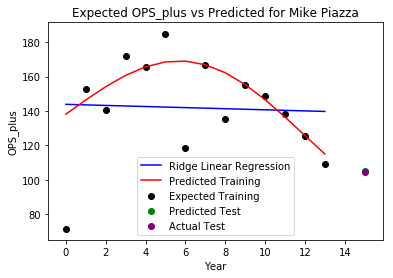

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.619
Variance score for LR: 0.024


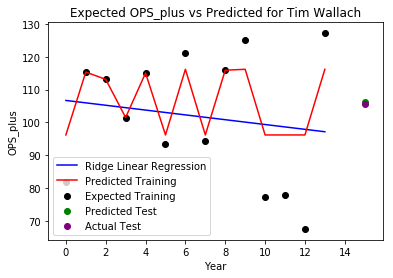

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.286
Variance score for LR: 0.353


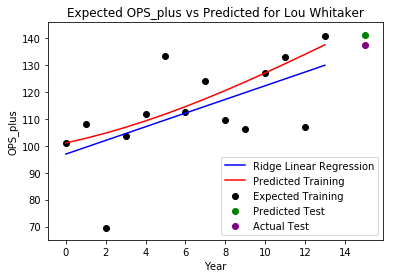

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.861
Variance score for LR: 0.187


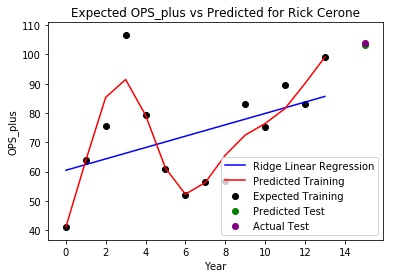

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.708
Variance score for LR: 0.001


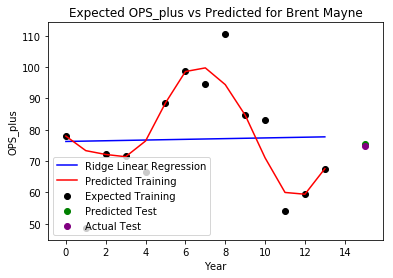

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.128
Variance score for LR: 0.140


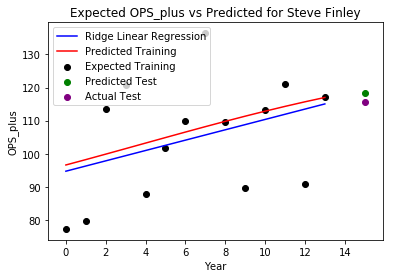

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.003
Variance score for LR: 0.138


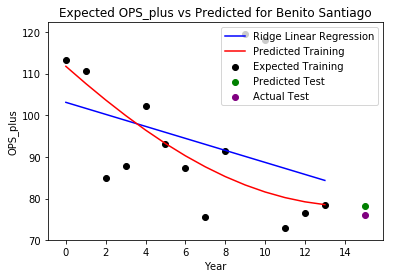

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.382
Variance score for LR: 0.030


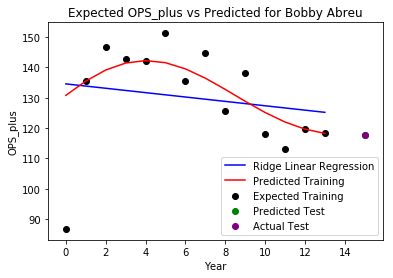

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: -0.027
Variance score for LR: 0.034


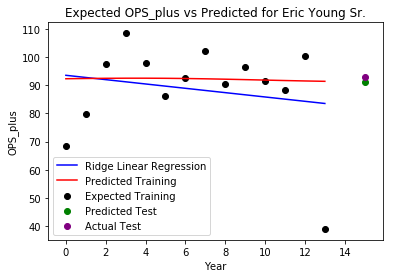

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.280
Variance score for LR: 0.375


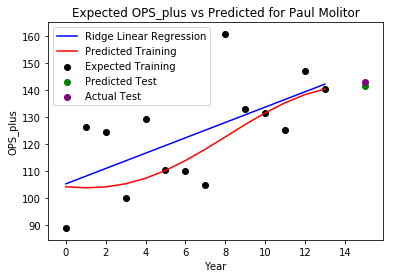

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.250
Variance score for LR: 0.064


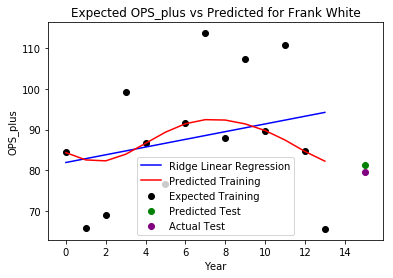

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.198
Variance score for LR: 0.259


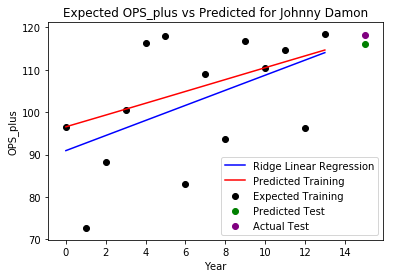

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.526
Variance score for LR: 0.511


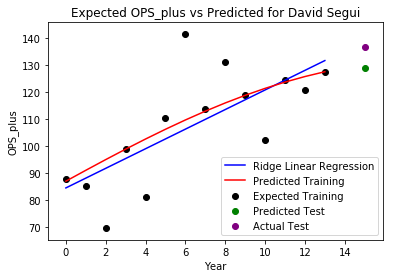

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.001
Variance score for LR: 0.091


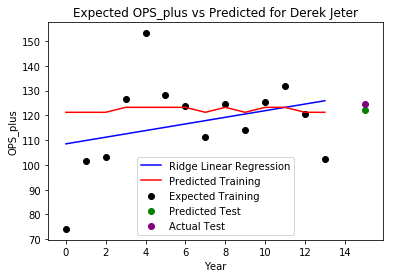

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.662
Variance score for LR: 0.288


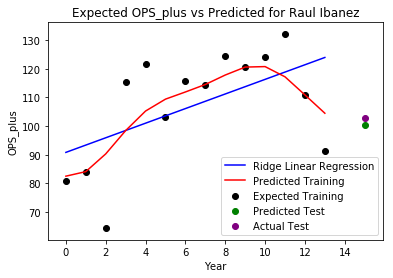

In [612]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# analysis on best 10 with just OPS_plus:

for player in best_ten:
    player_name = player[0]
    player_rows = df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == player_name]
    data = prepare_rows(player_rows)
    data_tuple = prepare_test_train(data[0], data[1])
    x_train, y_train, x_test, y_test = data_tuple

    parameters = {
        "kernel": ["rbf"],
        "C": [1,10,10,100,150,1000],
        "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e8],
        "epsilon": [0.1, 0.01]
        }

    svr = GridSearchCV(SVR(), parameters, cv=3)
    svr.fit(x_train, y_train.ravel())
    y_svr_pred = svr.predict(x_test)
    linearRegressor = Ridge(alpha=0.1)  # ditto for alpha
    linearRegressor.fit(x_train, y_train)  
    plt.plot(x_train, linearRegressor.predict(x_train), color = 'blue')

    plt.plot(svr.predict(x_train), color = 'red')
    plt.scatter(x_train,y_train, color = 'black')


    plt.scatter(len(y_train) + 1, y_svr_pred, color = 'green')
    plt.scatter(len(y_train) + 1, y_test, color = 'purple')
    plt.legend(('Ridge Linear Regression','Predicted Training', 'Expected Training', 'Predicted Test','Actual Test'))
    print('Variance score for SVR: %.3f' % r2_score(y_train, svr.predict(x_train)))
    print('Variance score for LR: %.3f' % r2_score(y_train, linearRegressor.predict(x_train)))




    plt.title('Expected OPS_plus vs Predicted for %s' % player_name)
    plt.xlabel('Year')
    plt.ylabel('OPS_plus')
    plt.show()

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.320
Variance score for LR: 0.000


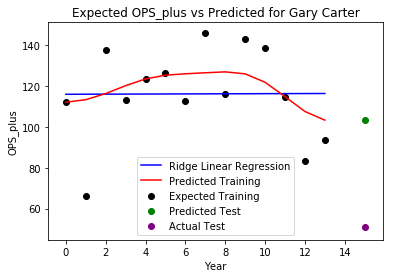

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.476
Variance score for LR: 0.278


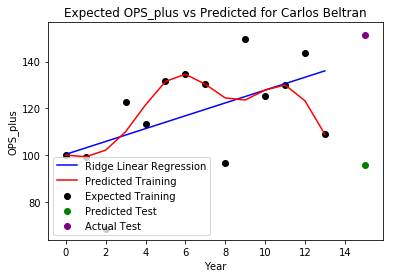

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 1.000
Variance score for LR: 0.018


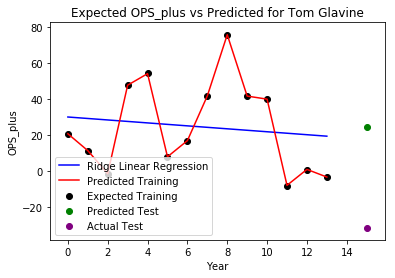

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.533
Variance score for LR: 0.392


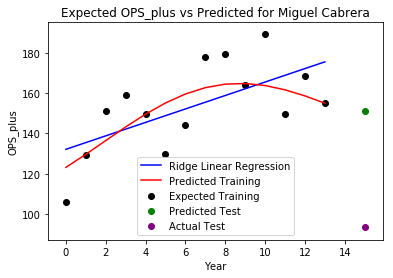

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.775
Variance score for LR: 0.208


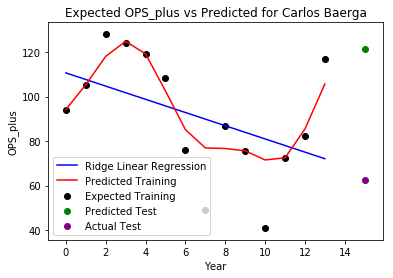

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: -0.002
Variance score for LR: 0.003


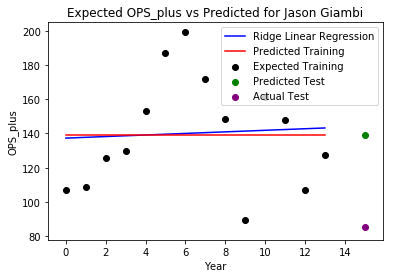

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.118
Variance score for LR: 0.262


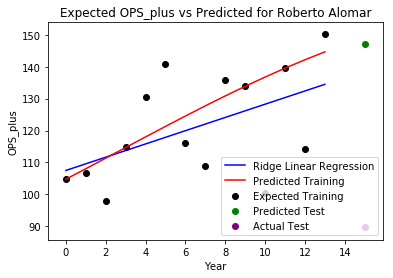

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.309
Variance score for LR: 0.448


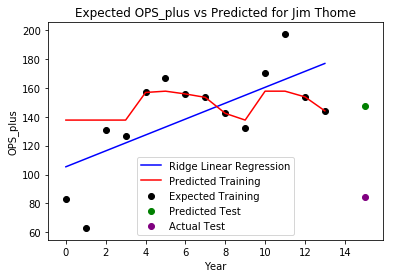

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.067
Variance score for LR: 0.177


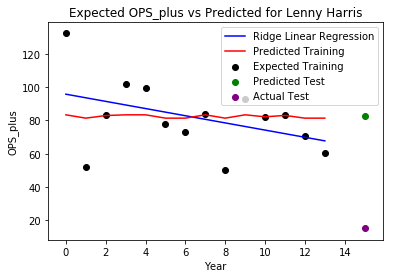

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.481
Variance score for LR: 0.614


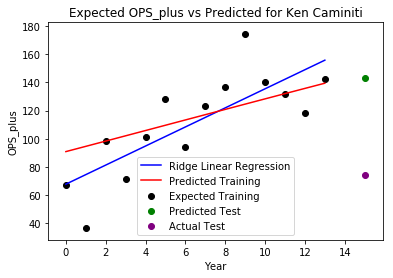

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 1.000
Variance score for LR: 0.019


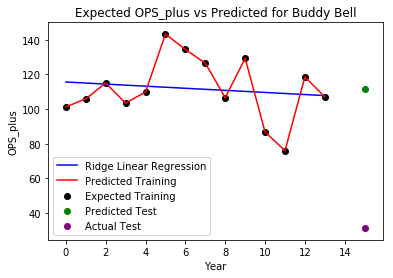

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: -0.035
Variance score for LR: 0.049


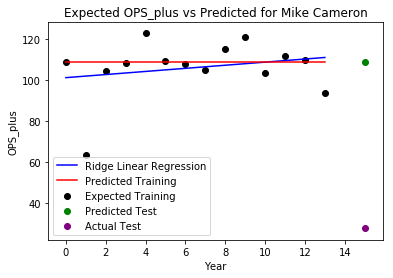

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.447
Variance score for LR: 0.005


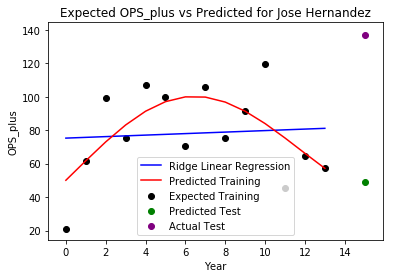

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 1.000
Variance score for LR: 0.063


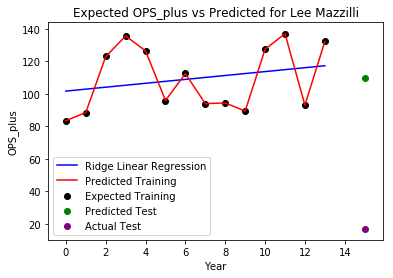

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: -0.025
Variance score for LR: 0.064


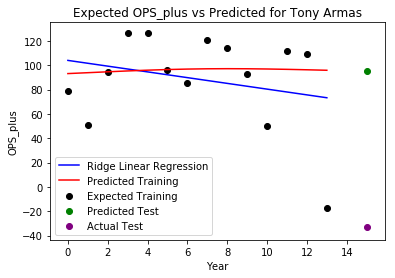

In [616]:
for player in worst_ten:
    player_name = player[0]
    player_rows = df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == player_name]
    data = prepare_rows(player_rows)
    data_tuple = prepare_test_train(data[0], data[1])
    x_train, y_train, x_test, y_test = data_tuple

    parameters = {
        "kernel": ["rbf"],
        "C": [1,10,10,100,150,1000],
        "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e8],
        "epsilon": [0.1, 0.01]
        }

    svr = GridSearchCV(SVR(), parameters, cv=3)
    svr.fit(x_train, y_train.ravel())
    y_svr_pred = svr.predict(x_test)
    linearRegressor = Ridge(alpha=0.1)  # ditto for alpha
    linearRegressor.fit(x_train, y_train)  
    plt.plot(x_train, linearRegressor.predict(x_train), color = 'blue')

    plt.plot(svr.predict(x_train), color = 'red')

    plt.scatter(x_train,y_train, color = 'black')


    plt.scatter(len(y_train) + 1, y_svr_pred, color = 'green')
    plt.scatter(len(y_train) + 1, y_test, color = 'purple')
    plt.legend(('Ridge Linear Regression','Predicted Training', 'Expected Training', 'Predicted Test','Actual Test'))
    print('Variance score for SVR: %.3f' % r2_score(y_train, svr.predict(x_train)))
    print('Variance score for LR: %.3f' % r2_score(y_train, linearRegressor.predict(x_train)))

    plt.title('Expected OPS_plus vs Predicted for %s' % player_name)
    plt.xlabel('Year')
    plt.ylabel('OPS_plus')
    plt.show()

105


/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.450
Variance score for LR: 0.455


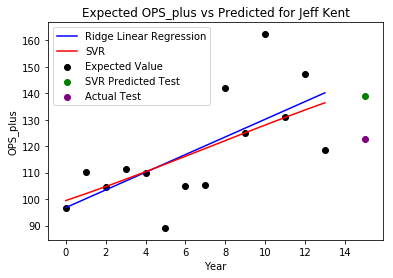

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.511
Variance score for LR: 0.101


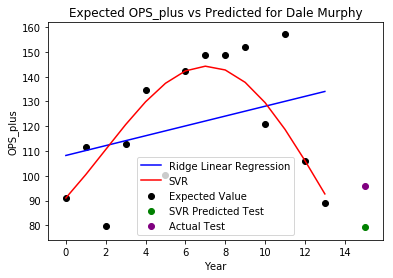

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.126
Variance score for LR: 0.188


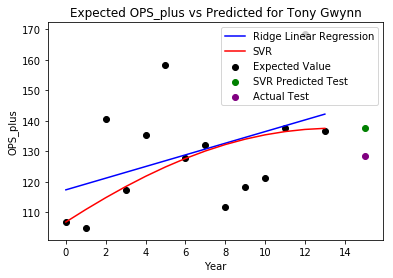

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.065
Variance score for LR: 0.070


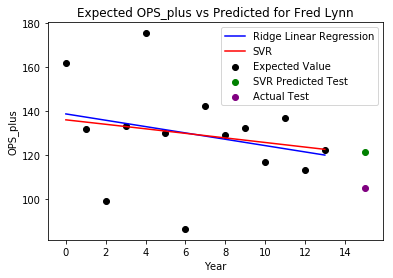

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.680
Variance score for LR: 0.659


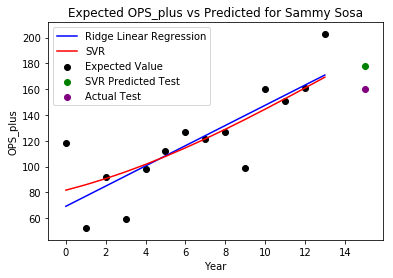

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.467
Variance score for LR: 0.287


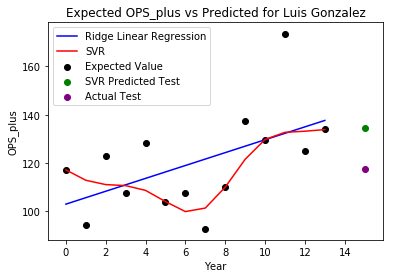

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.485
Variance score for LR: 0.153


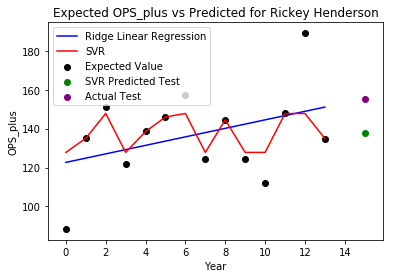

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 1.000
Variance score for LR: 0.041


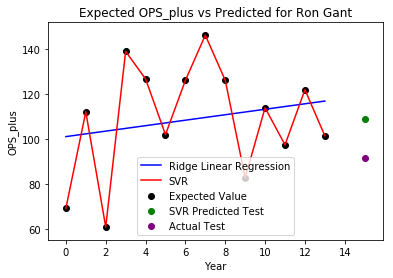

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.241
Variance score for LR: 0.326


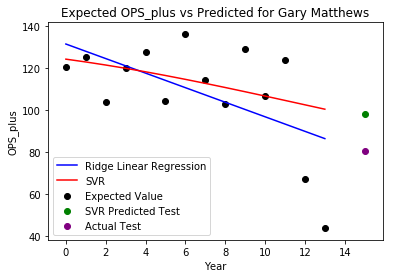

/Users/StephanieBrito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Variance score for SVR: 0.674
Variance score for LR: 0.563


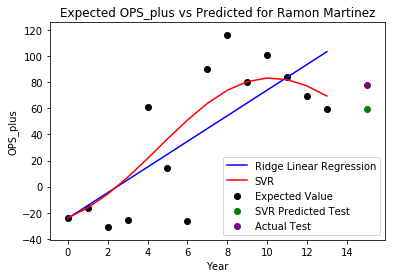

In [623]:
half = len(sorted_loss)//2
print(half)
middle_ten = sorted_loss[len(sorted_loss)//2: len(sorted_loss)//2 + 10]
for player in middle_ten:
    player_name = player[0]
    player_rows = df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == player_name]
    data = prepare_rows(player_rows)
    data_tuple = prepare_test_train(data[0], data[1])
    x_train, y_train, x_test, y_test = data_tuple

    parameters = {
        "kernel": ["rbf"],
        "C": [1,10,10,100,150,1000],
        "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e8],
        "epsilon": [0.1, 0.01]
        }

    svr = GridSearchCV(SVR(), parameters, cv=3)
    svr.fit(x_train, y_train.ravel())
    y_svr_pred = svr.predict(x_test)
    linearRegressor = Ridge(alpha=0.1)  # ditto for alpha
    linearRegressor.fit(x_train, y_train)  
    plt.plot(x_train, linearRegressor.predict(x_train), color = 'blue')

    plt.plot(svr.predict(x_train), color = 'red')

    plt.scatter(x_train,y_train, color = 'black')


    plt.scatter(len(y_train) + 1, y_svr_pred, color = 'green')
    plt.scatter(len(y_train) + 1, y_test, color = 'purple')
    plt.legend(('Ridge Linear Regression','SVR', 'Expected Value', 'SVR Predicted Test','Actual Test'))
    print('Variance score for SVR: %.3f' % r2_score(y_train, svr.predict(x_train)))
    print('Variance score for LR: %.3f' % r2_score(y_train, linearRegressor.predict(x_train)))

    plt.title('Expected OPS_plus vs Predicted for %s' % player_name)
    plt.xlabel('Year')
    plt.ylabel('OPS_plus')
    plt.show()

In [615]:
df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == 'Tony Phillips']

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,PA,G,...,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg
76207,Tony Phillips,23.0,120522.0,phillto02,1982,OAK,1,AL,100.0,40,...,4.39585,1.869,1.863,0.5052,0.5007,0.5092,0.4910,74.5133,30.391,31.720
76208,Tony Phillips,24.0,120522.0,phillto02,1983,OAK,1,AL,476.0,148,...,4.38778,1.872,1.864,0.4982,0.5036,0.5006,0.4885,85.3142,147.916,159.897
76209,Tony Phillips,25.0,120522.0,phillto02,1984,OAK,1,AL,505.0,154,...,4.31999,1.864,1.856,0.5015,0.5036,0.5038,0.4881,96.7953,157.119,172.913
76210,Tony Phillips,26.0,120522.0,phillto02,1985,OAK,1,AL,178.0,42,...,4.43841,1.890,1.872,0.5288,0.5163,0.5157,0.4850,120.7747,55.353,62.935
76211,Tony Phillips,27.0,120522.0,phillto02,1986,OAK,1,AL,532.0,118,...,4.49203,1.893,1.878,0.5235,0.5113,0.5154,0.4850,102.9071,166.628,173.357
76212,Tony Phillips,28.0,120522.0,phillto02,1987,OAK,1,AL,441.0,111,...,4.79824,1.920,1.913,0.5041,0.5002,0.5071,0.4867,94.3616,142.192,156.186
76213,Tony Phillips,29.0,120522.0,phillto02,1988,OAK,1,AL,251.0,79,...,4.27049,1.853,1.849,0.4850,0.4953,0.4902,0.4884,79.4297,80.100,81.705
76214,Tony Phillips,30.0,120522.0,phillto02,1989,OAK,1,AL,524.0,143,...,4.19154,1.851,1.841,0.5039,0.5027,0.5039,0.4858,99.1579,166.962,170.749
76215,Tony Phillips,31.0,120522.0,phillto02,1990,DET,1,AL,687.0,152,...,4.17735,1.855,1.841,0.5169,0.5081,0.5110,0.4836,100.9057,222.926,223.069
76216,Tony Phillips,32.0,120522.0,phillto02,1991,DET,1,AL,655.0,146,...,4.32211,1.876,1.858,0.5206,0.5140,0.5061,0.4838,121.9524,216.073,224.641


In [ ]:
## OLD CODE -- doing the analysis with all features

# for the player specific SVR, I will choose players with at least 20 years of activity. 
# the data will be split as follows:
# x_train: year 0-5 data. the shape is: (num_samples, num_features) -> (6, num_features)
# y_train: year 6-12 OPS_plus. the shape is: (num_samples, 1) -> (6,1)

# x_test: year 13-14 data
# y_test: year 14-15 data



In [ ]:
def prepare_test_train(player_x_data, player_y_data):
    i_0, i_1, i_2, i_3 = 6, 12, 13, 14 # hardcoded for now. these are just the ranges described above
    x_train = player_x_data[:i_0,:]
    y_train = player_y_data[i_0:i_1]
    x_test = player_x_data[i_1:i_2]
    y_test = player_y_data[i_2: i_3]
    return (x_train, y_train, x_test, y_test)

In [ ]:
from sklearn import preprocessing

def prepare_rows(player_rows):
    player_x_data =player_rows[['age', 'PA', 'G', 'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field',
                                       'WAA', 'WAA_off', 'WAA_def', 'WAR']].values
    player_y_data = player_rows[['OPS_plus']].values
    return (preprocessing.scale(player_x_data), preprocessing.scale(player_y_data))

In [ ]:
from collections import defaultdict
loss_dict = defaultdict(float)
tot_mse_loss = 0
tot_mae_loss = 0
y_true = []
y_pred = []

for player in players_with_more_than_20_years:
    print(player)
    player_rows = df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == player]
    data = prepare_rows_new(player_rows)
    data_tuple = prepare_test_train_new(data[0], data[1])
    results = run_svr(data_tuple)
    loss_dict[player] = results
    y_true.append(results[0][0])
    y_pred.append(results[1][0])
    tot_mse_loss += loss_dict[player][-1]
    tot_mae_loss += loss_dict[player][-2]

In [ ]:

# analysis on best 10:

for player in best_ten:
    player_name = player[0]
    player_rows = df_probably_not_pitchers[df_probably_not_pitchers['name_common'] == player_name]
    data = prepare_rows(player_rows)
    data_tuple = prepare_test_train(data[0], data[1])
    x_train, y_train, x_test, y_test = data_tuple

    parameters = {
        "kernel": ["rbf"],
        "C": [1,10,10,100,150,1000],
        "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e8],
        "epsilon": [0.1, 0.01]
        }

    svr = GridSearchCV(SVR(), parameters, cv=3)
    svr.fit(x_train, y_train.ravel())
    y_svr_pred = svr.predict(x_test)
    
    

    X_grid = np.arange(min(x_train[:,:1]), max(x_train[:,:1]), 0.1)
    X_grid = X_grid.reshape((len(X_grid), 1))

    plt.plot(svr.predict(x_train), color = 'red')
    plt.plot(y_train, color = 'blue')


    plt.scatter(len(y_train),  x_test[0][-1], color = 'black')
    plt.scatter(len(y_train) + 1, y_svr_pred, color = 'green')
    plt.scatter(len(y_train) + 1, y_test, color = 'purple')
    plt.legend(('Predicted Training', 'Expected Training', 'Year to Predict From', 'Predicted Test','Actual Test'))

    plt.title('Expected OPS_plus vs Predicted for %s' % player_name)
    plt.xlabel('Year')
    plt.ylabel('OPS_plus')
    plt.show()